In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
os.getcwd()

In [3]:
os.chdir("C:\\Users\\Nurlan\\DU_Big_Data\\Projet")

# Base freq

In [ ]:
base_freq = pd.read_excel("db_freq.xlsx",decimal = ",")
freq = base_freq.copy()
freq.sort_values(by=["IDpol"],ascending = [True],inplace = True)
freq

In [5]:
freq.info()
#freq.count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64195 entries, 37369 to 28944
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   IDpol       64195 non-null  object
 1   Year        64195 non-null  int64 
 2   Damage      64195 non-null  int64 
 3   Fire        64195 non-null  int64 
 4   Other       64195 non-null  int64 
 5   Theft       64195 non-null  int64 
 6   TPL         64195 non-null  int64 
 7   Windscreen  64195 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 4.4+ MB


# Base Sev

In [ ]:
base_sev =  pd.read_csv("db_sev.txt", delimiter="\t")
#base_sev =  pd.read_csv("db_sev.txt", delimiter="\t",index_col = 0) #sev.set_index('IDpol', inplace = True)
sev = base_sev.copy()
#sev.sort_values(by=["IDpol"],ascending = [True],inplace = True)
#sev.set_index('IDpol', inplace = True)
sev

# Base Prem

In [ ]:
base_prem = pd.read_csv("db_prem.csv",delimiter=";",decimal = ",")
prem = base_prem.copy()
prem.sort_values(by=["IDpol"],ascending = [True],inplace = True)
prem

In [8]:
# prem.info()
# prem.count()
# prem.notna().sum()


# Doublons

Base Freq

In [9]:
len(freq.IDpol) - freq.IDpol.nunique()

32097

In [10]:
sum(freq.duplicated())
#freq.duplicated().sum()

0

Base sev

In [11]:
len(sev.IDpol) - sev.IDpol.nunique()

2436

In [12]:
sum(sev.duplicated())

0

Base Prem

In [13]:
len(prem.IDpol) - prem.IDpol.nunique()

20255

In [14]:
prem.duplicated()
#prem.duplicated().sum()

4533     False
8368     False
1013     False
3003     False
3605     False
         ...  
4816     False
20639    False
20885    False
37807    False
47307    False
Length: 52372, dtype: bool

In [15]:
sum(prem.duplicated()) 
#prem.duplicated().sum()

0

In [ ]:
prem[prem.duplicated(subset = "IDpol", keep = False)].sort_values(by = 'IDpol')
# non-pure duplicates
# different year 2003 and 2004
# differences in PremLegal PremTPLM PremTPLV PremServ PremTheft PremTot

# Gestion des DM

Base sev

In [17]:

sev.isna().sum()
#sev.isna().sum().sum()

IDpol        0
OccurDate    0
Payment      0
IDclaim      0
Guarantee    0
dtype: int64

Base freq

In [18]:
freq.isna().sum()

IDpol         0
Year          0
Damage        0
Fire          0
Other         0
Theft         0
TPL           0
Windscreen    0
dtype: int64

Base Prem

In [19]:
# only quantitative variables
prem.select_dtypes(exclude='object')

,Year,DrivAge,BonusMalus,LicenceNb,VehAge,PremWindscreen,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
4533,2004,44,50.0,3,10.0,16,0,0,0,0,7,75.3,4,55,0,157.3
8368,2003,44,50.0,3,10.0,15,0,0,0,0,6,69.1,4,50,0,144.1
1013,2003,26,85.0,2,8.0,16,0,0,0,0,7,139.3,7,46,0,215.3
3003,2004,26,85.0,2,8.0,19,0,0,0,0,8,168.5,9,56,0,260.5
3605,2003,26,106.0,2,9.0,34,0,0,0,0,11,283.0,15,57,0,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,2004,38,112.0,1,9.0,0,0,0,0,55,13,356.6,19,60,0,503.6
20639,2004,38,118.0,1,6.0,102,0,22,0,60,17,521.5,27,60,250,1059.5
20885,2003,38,112.0,1,6.0,117,0,20,0,61,19,525.1,27,62,193,1024.1
37807,2004,26,90.0,1,8.0,44,0,10,0,56,17,379.1,20,56,102,684.1


In [20]:
# Extract all column headings
Columns_prem = prem.columns
Columns_prem

Index(['IDpol', 'Year', 'DrivAge', 'DrivGender', 'MaritalStatus', 'BonusMalus',
       'LicenceNb', 'PayFreq', 'JobCode', 'VehAge', 'VehClass', 'VehPower',
       'VehGas', 'VehUsage', 'Garage', 'Area', 'Region', 'Channel',
       'Marketing', 'PremWindscreen', 'PremDamAll', 'PremFire', 'PremAcc1',
       'PremAcc2', 'PremLegal', 'PremTPLM', 'PremTPLV', 'PremServ',
       'PremTheft', 'PremTot'],
      dtype='object')

In [21]:
# Select only quantitative columns and create a list at the same time
Columns_prem2 = [prem.select_dtypes(exclude='object').columns]
Columns_prem2

[Index(['Year', 'DrivAge', 'BonusMalus', 'LicenceNb', 'VehAge',
        'PremWindscreen', 'PremDamAll', 'PremFire', 'PremAcc1', 'PremAcc2',
        'PremLegal', 'PremTPLM', 'PremTPLV', 'PremServ', 'PremTheft',
        'PremTot'],
       dtype='object')]

In [22]:
#transform as a list

variab_in_prem = []
for element in Columns_prem :
    variab_in_prem.append(element)

In [23]:
variab_in_prem

['IDpol',
 'Year',
 'DrivAge',
 'DrivGender',
 'MaritalStatus',
 'BonusMalus',
 'LicenceNb',
 'PayFreq',
 'JobCode',
 'VehAge',
 'VehClass',
 'VehPower',
 'VehGas',
 'VehUsage',
 'Garage',
 'Area',
 'Region',
 'Channel',
 'Marketing',
 'PremWindscreen',
 'PremDamAll',
 'PremFire',
 'PremAcc1',
 'PremAcc2',
 'PremLegal',
 'PremTPLM',
 'PremTPLV',
 'PremServ',
 'PremTheft',
 'PremTot']

In [24]:
# transform as a list only quantitative variables with a FOR loop

variab_in_prem2 = []
for element in prem.select_dtypes(exclude='object').columns :
    variab_in_prem2.append(element)

In [25]:
variab_in_prem2

['Year',
 'DrivAge',
 'BonusMalus',
 'LicenceNb',
 'VehAge',
 'PremWindscreen',
 'PremDamAll',
 'PremFire',
 'PremAcc1',
 'PremAcc2',
 'PremLegal',
 'PremTPLM',
 'PremTPLV',
 'PremServ',
 'PremTheft',
 'PremTot']

In [26]:

prem.isna().sum()

# Variables with Missing data

# MaritalStatus 17120 object +
# BonusMalus    52196 float64 
# JobCode       17120 object +
# VehAge        51887 float64
# VehPower      52364 object 
# VehGas        52209 object 
# VehUsage      52244 object 
# Channel       16420 object +

# "+" Sucepptibles to remove

IDpol                 0
Year                  0
DrivAge               0
DrivGender            0
MaritalStatus     35252
BonusMalus          176
LicenceNb             0
PayFreq               0
JobCode           35252
VehAge              485
VehClass              0
VehPower              8
VehGas              163
VehUsage            128
Garage                0
Area                  0
Region                0
Channel           35952
Marketing             0
PremWindscreen        0
PremDamAll            0
PremFire              0
PremAcc1              0
PremAcc2              0
PremLegal             0
PremTPLM              0
PremTPLV              0
PremServ              0
PremTheft             0
PremTot               0
dtype: int64

In [27]:
# The sum of all DMs

prem.isna().sum().sum()


107416

In [28]:
len(prem)

52372

In [29]:
# calculating missing data in % of the MaritalStatus variable

poids = (len(prem) - prem.MaritalStatus.count()) / len(prem)
poids

0.6731077675093562

In [30]:
# calculate missing data in % of all columns
for element in prem.columns :
    print((len(prem) - prem[element].count()) / len (prem) )

0.0
0.0
0.0
0.0
0.6731077675093562
0.0033605743527075536
0.0
0.0
0.6731077675093562
0.009260673642404339
0.0
0.00015275337966852515
0.0031123501107462002
0.0024440540746964025
0.0
0.0
0.0
0.686473688230352
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [31]:
# calculate missing data in % as columns con NaN. reference value 52372

lista = []
for element in prem.columns :
    if prem[element].count() < len(prem) :
        lista.append(element)
        print(prem[element].name + " : " + str (round(((len(prem) - prem[element].count()) / len (prem))*100,3)))
    

MaritalStatus : 67.311
BonusMalus : 0.336
JobCode : 67.311
VehAge : 0.926
VehPower : 0.015
VehGas : 0.311
VehUsage : 0.244
Channel : 68.647


In [32]:
lista

['MaritalStatus',
 'BonusMalus',
 'JobCode',
 'VehAge',
 'VehPower',
 'VehGas',
 'VehUsage',
 'Channel']

In [33]:
# MaritalStatus values
prem["MaritalStatus"].value_counts(dropna=False)

NaN           35252
Cohabiting    10748
Married        3586
Single         2051
Widowed         546
Divorced        189
Name: MaritalStatus, dtype: int64

In [34]:
#Remove 3 columns with NaN by +60%
prem_ssDM=prem.drop(['MaritalStatus','JobCode','Channel'], axis=1) 


In [35]:
# column values with observations < a 52372
Col_DM = []
for element in prem.columns :
    if prem[element].count() < len(prem) :
        Col_DM.append(element)
        print(prem[element].value_counts(dropna= False))

NaN           35252
Cohabiting    10748
Married        3586
Single         2051
Widowed         546
Divorced        189
Name: MaritalStatus, dtype: int64
50.0     19866
80.0      2526
85.0      2441
64.0      2405
60.0      2400
         ...  
108.0        2
89.0         2
145.0        2
126.0        1
99.0         1
Name: BonusMalus, Length: 69, dtype: int64
NaN                 35252
Private employee     9202
Public employee      5085
Retiree              1040
Other                 865
Craftsman             643
Farmer                259
Retailer               26
Name: JobCode, dtype: int64
7.0     4822
8.0     4538
6.0     4285
5.0     4139
9.0     4050
4.0     3519
10.0    3386
2.0     3329
3.0     3049
1.0     2812
11.0    2795
12.0    2319
13.0    1899
0.0     1708
14.0    1586
15.0    1144
16.0     743
NaN      485
17.0     428
18.0     313
19.0     262
20.0     182
21.0     102
22.0      87
23.0      82
24.0      77
26.0      54
25.0      41
27.0      35
29.0      19
30.0      12

In [36]:
Col_DM

['MaritalStatus',
 'BonusMalus',
 'JobCode',
 'VehAge',
 'VehPower',
 'VehGas',
 'VehUsage',
 'Channel']

Complete missing data

In [37]:
prem['VehUsage'].value_counts()

Private+trip to office    50722
Professional               1097
Professional run            425
Name: VehUsage, dtype: int64

In [38]:
prem.VehUsage.mode()
# Identify the mode

0    Private+trip to office
Name: VehUsage, dtype: object

In [39]:
prem_ssDM.VehUsage = prem_ssDM.VehUsage.fillna(prem.VehUsage.mode()[0]) 
# replacement by mode

In [40]:
# VehUsage modificated
prem_ssDM['VehUsage'].value_counts()

Private+trip to office    50850
Professional               1097
Professional run            425
Name: VehUsage, dtype: int64

In [41]:
prem_ssDM['VehUsage'].isna().sum()

0

In [42]:
prem_ssDM.VehAge.describe() 

count    51887.000000
mean         7.525238
std          4.776407
min          0.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         89.000000
Name: VehAge, dtype: float64

In [43]:

prem_ssDM.VehAge = prem_ssDM.VehAge.fillna(prem_ssDM.VehAge.mean()) 
#replacement by average

#prem_ssDM.VehAge = prem_ssDM.VehAge.fillna(prem_ssDM.VehAge.mode()[0]) 

In [44]:
# VehAge modificated
prem_ssDM['VehAge'].isna().sum()

0

In [45]:
prem_ssDM['VehPower'].isna().sum()

8

In [46]:
prem_ssDM['VehPower'].value_counts()

P10    9218
P12    8415
P11    8385
P9     6732
P13    6656
P8     5224
P14    3805
P15    1519
P7      953
P16     729
P5      605
P17      58
P4       48
P2       15
P6        2
Name: VehPower, dtype: int64

In [47]:
prem_ssDM.VehPower = prem_ssDM.VehPower.fillna(prem_ssDM.VehPower.mode()[0]) 
# Imputation by mode in VehPower column

In [48]:
prem_ssDM["VehGas"].value_counts()

Regular    31483
Diesel     19647
Gazole      1079
Name: VehGas, dtype: int64

In [49]:
prem_ssDM['VehPower'].isna().sum()

0

In [50]:
prem_ssDM['VehGas'].isna().sum()

163

In [51]:
# # Imputation by mode in VehGas column 
prem_ssDM.VehGas = prem_ssDM.VehGas.fillna(prem_ssDM.VehGas.mode()[0]) 

In [52]:
prem_ssDM['VehGas'].isna().sum()

0

In [53]:
#prem_ssDM.dtypes

In [54]:
# Analisis BonusMalus

# identification of a correlation in order to make an imputation by the conditional mean but no significant correlation

import seaborn as sns


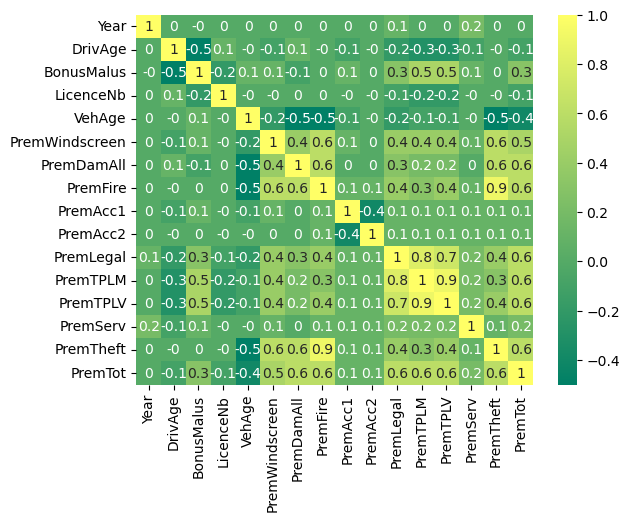

In [55]:
sns.heatmap(round(prem_ssDM.corr(method = "kendall"),1),annot=True,cmap='summer')
plt.show()

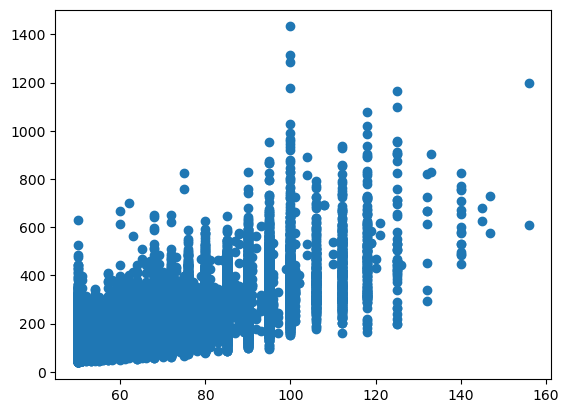

In [56]:
plt.scatter(prem_ssDM["BonusMalus"],prem_ssDM["PremTPLM"])
plt.show()
# no significant correlation

In [57]:
#we take the DriveAge,VehAge and BonusMalus variables to see if there is a correlation with a 3d graph

DrivAge = np.array([prem_ssDM.PremTPLM])
DrivAge

array([[ 75.3,  69.1, 139.3, ..., 525.1, 379.1, 392. ]])

In [58]:
VehAge = np.array([prem_ssDM.PremFire ])
VehAge

array([[ 0,  0,  0, ..., 20, 10, 10]], dtype=int64)

In [59]:
BonusMalus = np.array([prem_ssDM.BonusMalus])
BonusMalus

array([[ 50.,  50.,  85., ..., 112.,  90.,  95.]])

In [60]:
#normalization of data for the graph

from sklearn import preprocessing

escalar = preprocessing.MinMaxScaler() 
DrivAge_escal= escalar.fit_transform(DrivAge)


In [61]:
escalar = preprocessing.MinMaxScaler()
VehAge_escal= escalar.fit_transform(VehAge)


In [ ]:
escalar = preprocessing.MinMaxScaler()
BonusMalus_escal= escalar.fit_transform(BonusMalus)

In [63]:
données = np.stack((DrivAge_escal,VehAge_escal,BonusMalus_escal)) #group the observations

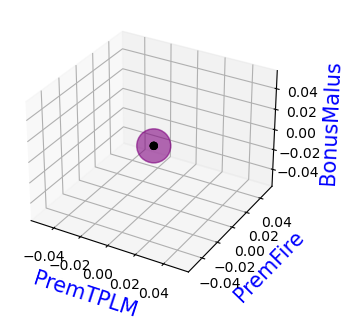

In [64]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(2, 2, 2, projection="3d")

ax.scatter(données.T[0], données.T[1], données.T[2],
           marker="o", c="purple", s=600, alpha=0.25)
ax.scatter(données.T[0], données.T[1], données.T[2],
           marker=".", c="black", s=100)

ax.set_xlabel("PremTPLM", fontsize=15, color="blue")
ax.set_ylabel("PremFire", fontsize=15, color="blue")
ax.set_zlabel("BonusMalus", fontsize=15, color="blue")

plt.show()

# the graph does not show a cloud of points, so we cannot make an imputation by the method of K means

In [65]:
# then as the kmeans method is not possible, we eliminate the rows with missing data
prem_ssDM = prem_ssDM.dropna(subset=["BonusMalus"])

In [66]:
# base prope
prem_ssDM.isna().sum()
#prem_ssDM.isna().sum().sum()

IDpol             0
Year              0
DrivAge           0
DrivGender        0
BonusMalus        0
LicenceNb         0
PayFreq           0
VehAge            0
VehClass          0
VehPower          0
VehGas            0
VehUsage          0
Garage            0
Area              0
Region            0
Marketing         0
PremWindscreen    0
PremDamAll        0
PremFire          0
PremAcc1          0
PremAcc2          0
PremLegal         0
PremTPLM          0
PremTPLV          0
PremServ          0
PremTheft         0
PremTot           0
dtype: int64

In [67]:
prem_ssDM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52196 entries, 4533 to 47307
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IDpol           52196 non-null  object 
 1   Year            52196 non-null  int64  
 2   DrivAge         52196 non-null  int64  
 3   DrivGender      52196 non-null  object 
 4   BonusMalus      52196 non-null  float64
 5   LicenceNb       52196 non-null  int64  
 6   PayFreq         52196 non-null  object 
 7   VehAge          52196 non-null  float64
 8   VehClass        52196 non-null  object 
 9   VehPower        52196 non-null  object 
 10  VehGas          52196 non-null  object 
 11  VehUsage        52196 non-null  object 
 12  Garage          52196 non-null  object 
 13  Area            52196 non-null  object 
 14  Region          52196 non-null  object 
 15  Marketing       52196 non-null  object 
 16  PremWindscreen  52196 non-null  int64  
 17  PremDamAll      52196 non-nu

# DI

## Base Freq

In [68]:
for element in freq.columns :
    print(freq[element].value_counts())

90146417.100a    2
90156267.100a    2
90156278.101b    2
90156278.101a    2
90156278.100b    2
                ..
90131616.100b    2
90131616.100a    2
90131615.101a    2
90131615.100a    2
1000419.101a     1
Name: IDpol, Length: 32098, dtype: int64
2004    32098
2003    32097
Name: Year, dtype: int64
0    63257
1      923
2       15
Name: Damage, dtype: int64
0    64088
1      107
Name: Fire, dtype: int64
 0    63926
 1      213
-1       56
Name: Other, dtype: int64
0    63627
1      562
2        5
3        1
Name: Theft, dtype: int64
0    60180
1     3836
2      172
3        6
4        1
Name: TPL, dtype: int64
0    61077
1     3041
2       76
3        1
Name: Windscreen, dtype: int64


In [69]:
# -1 is another inconsistent variable
freq["Other"].value_counts()

 0    63926
 1      213
-1       56
Name: Other, dtype: int64

In [70]:
freq.Other.replace({-1: 1},inplace=True)

In [71]:
freq["Other"].value_counts()

0    63926
1      269
Name: Other, dtype: int64

## Base Prem

In [72]:
for element in prem_ssDM.columns :
    print(prem_ssDM[element].describe() )
    
# agedrive > 100 ans et < 18


count             52196
unique            32061
top       90160264.100a
freq                  4
Name: IDpol, dtype: object
count    52196.000000
mean      2003.381466
std          0.485751
min       2003.000000
25%       2003.000000
50%       2003.000000
75%       2004.000000
max       2004.000000
Name: Year, dtype: float64
count    52196.000000
mean        39.918270
std         11.969359
min          1.000000
25%         31.000000
50%         38.000000
75%         47.000000
max        198.000000
Name: DrivAge, dtype: float64
count     52196
unique        5
top           M
freq      33847
Name: DrivGender, dtype: object
count    52196.000000
mean        62.876638
std         15.219480
min         50.000000
25%         50.000000
50%         57.000000
75%         72.000000
max        156.000000
Name: BonusMalus, dtype: float64
count    52196.000000
mean         1.884723
std          0.665136
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max      

In [73]:
prem_ssDM.DrivGender.value_counts()

M         33847
F         17851
H           432
Male         42
Female       24
Name: DrivGender, dtype: int64

In [74]:
# database with no missing data or inconsistent data

prem_ssDMDI =  prem_ssDM

In [75]:
# The database is created with no missing data or inconsistent data
#prem_ssDMDI['DrivGender'] = prem_ssDM['DrivGender'].value_counts(dropna=True) 


In [76]:
prem_ssDMDI.DrivGender.replace({'H': "M", "Male":"M","Female":"F"},inplace=True)

In [77]:
prem_ssDMDI.DrivGender.value_counts()

M    34321
F    17875
Name: DrivGender, dtype: int64

In [ ]:
#outliers DriveAge

sns.boxplot(prem_ssDM.DrivAge)

plt.show()

In [79]:
# code with same graph but the difference is that above we use the seaborn librery and here we use a matplotlib method

# Outliers detection graphique DI colonne DriveAge

#plt.grid(True)
#plt.boxplot(prem_ssDM.DrivAge)
#plt.show()

In [80]:
# statistics of the variable
prem_ssDM.DrivAge.describe() 

count    52196.000000
mean        39.918270
std         11.969359
min          1.000000
25%         31.000000
50%         38.000000
75%         47.000000
max        198.000000
Name: DrivAge, dtype: float64

In [ ]:
# Nb Outliers DrivAge

prem_ssDM[(prem.DrivAge<18)|(prem.DrivAge>100)] 
#22 inconsistent rows

In [82]:
 
prem_ssDMDI = prem_ssDM[(prem_ssDM.DrivAge>=18)&(prem_ssDM.DrivAge<=100)] 
# selection of coherent rows (removal of the 22 anomalies)

In [ ]:
# Colonne DriveAge modificated
sns.boxplot(prem_ssDMDI.DrivAge)

plt.show()

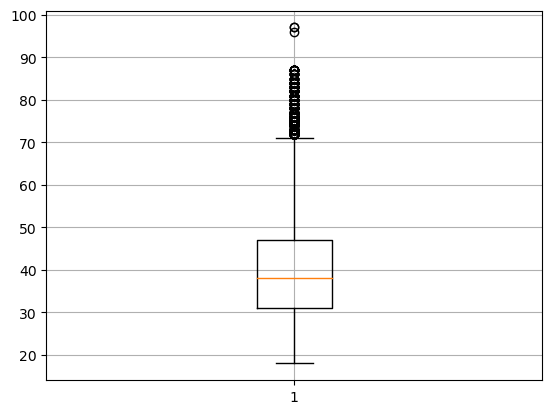

In [84]:
# Corrected DriveAge column graph with method from matplotlib
plt.grid(True)
plt.boxplot(prem_ssDMDI.DrivAge)
plt.show()

In [85]:
prem_ssDMDI.DrivAge.describe() 

count    52174.000000
mean        39.902288
std         11.840062
min         18.000000
25%         31.000000
50%         38.000000
75%         47.000000
max         97.000000
Name: DrivAge, dtype: float64

Base sev

identification of inconsistent data in Sev database

In [86]:
sev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9274 entries, 0 to 9273
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IDpol      9274 non-null   object
 1   OccurDate  9274 non-null   int64 
 2   Payment    9274 non-null   object
 3   IDclaim    9274 non-null   int64 
 4   Guarantee  9274 non-null   object
dtypes: int64(2), object(3)
memory usage: 362.4+ KB


In [87]:
 sev.dtypes
# Column Payment as object

IDpol        object
OccurDate     int64
Payment      object
IDclaim       int64
Guarantee    object
dtype: object

In [ ]:
# Payment Non-numerical 
sns.catplot(x="Guarantee", y="Payment", data=sev,kind="bar")

plt.show()

In [ ]:

pd.to_numeric(sev["Payment"])

In [ ]:
sev.iloc[67] # look at the row number 67

In [90]:
# access row 67 column 2
sev.iat[67,2]

'Waiting'

In [91]:
sev.Payment[67]

'Waiting'

In [92]:
sev= sev[sev['Payment'].str.contains('\d+')] # remove the string in Payment

In [ ]:
sev.Payment = pd.to_numeric(sev["Payment"])

In [94]:
#sev.drop(573,axis=0, inplace = True)
#sev.drop(573)

In [95]:
sev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9269 entries, 0 to 9273
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IDpol      9269 non-null   object
 1   OccurDate  9269 non-null   int64 
 2   Payment    9269 non-null   int64 
 3   IDclaim    9269 non-null   int64 
 4   Guarantee  9269 non-null   object
dtypes: int64(3), object(2)
memory usage: 434.5+ KB


In [ ]:
sev

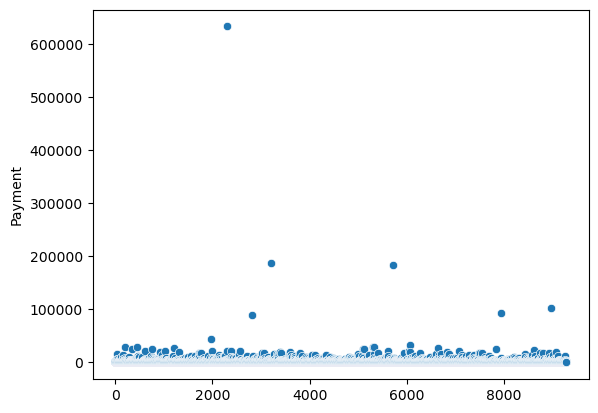

In [97]:
# graphically identify outliers
sns.scatterplot(data=sev.Payment)
plt.show()

In [98]:
# identify the value of the outlier

for element in sev.Payment:
    if element > 200000 :
        print(element)

632893


### there are 2 methods

# Z score method for processing Outliers *Retained method

A z-score tells you how many standard deviations a given value is from the mean. We use the following formula to calculate a z-score:

z = (X – μ) / σ

where:

X is a single raw data value
μ is the population mean
σ is the population standard deviation
You could define an observation to be an outlier if it has a z-score less than -3 or greater than 3.

Outliers = Observations with z-scores > 3 or < -3

# Interquartile Méthode

The interquartile range (IQR) is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) in a dataset. It measures the spread of the middle 50% of values.

You could define an observation to be an outlier if it is 1.5 times the interquartile range greater than the third quartile (Q3) or 1.5 times the interquartile range less than the first quartile (Q1).

Outliers = Observations > Q3 + 1.5*IQR  or  Q1 – 1.5*IQR


#find Q1, Q3, and interquartile range for each column
data=sev.Payment
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR)))]

#find how many rows are left in the dataframe 
data_clean.shape

data_clean.info()

sns.scatterplot(data=data_clean)
plt.show()


In [ ]:
# Traitement des outiliers Methone Z score : # Treatment of outliers Z score method: make the graph more readable; 

import scipy.stats as stats
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(sev.Payment))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
sev.Payment = sev.Payment[(z<3)]

#find how many rows are left in the dataframe 
sev.shape

(99,3)

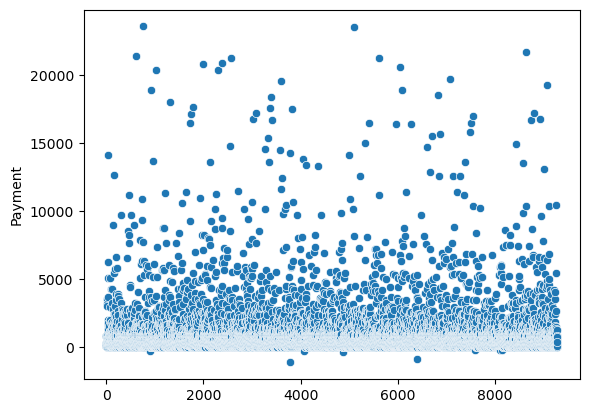

In [100]:
#graph without outliers
sns.scatterplot(data= sev.Payment)
plt.show()

# Jointure

## Base Freq

In [ ]:
freq

IDpol can appear twice (year 2003 or year 2004) we will concatenate IDpol and the column Year

In [102]:
# replace str for concatenation
columnas = ['IDpol']

freq[columnas] = freq[columnas].replace({'a':'1','b':'2','c':'3','d':'4','e':'5','f':'6','g':'7','h':'8','A':'1'}, regex=True)

In [ ]:
# elimination of punctuation marks:

import string
freq[columnas] = freq[columnas].astype(str).apply(lambda x: x.str.replace('[{}]'.format(string.punctuation), ''))

In [ ]:
# column Tot_nb_sin is the horizontal sum of the other columns
 
Cols_sin = ["Damage","Fire","Other","Theft","TPL","Windscreen"]
freq['Tot_Nb_sin'] = freq[Cols_sin].sum(axis=1)
freq.head()

# freq_grup = freq.groupby(["IDpol"]).sum()
# freq_grup

In [105]:
# not many individuals with > 3 incidents
freq["Tot_Nb_sin"].value_counts()


0    55674
1     7798
2      671
3       46
4        6
Name: Tot_Nb_sin, dtype: int64

In [106]:
#Access line info
 
#freq.drop([2899],axis=0,inplace=True)

In [107]:
# Year as a string pour concatener

freq['Year'] = freq['Year'].astype(str)

In [108]:
# IDpol as a string pour concatener
freq['IDpol'] = freq['IDpol'].astype(str)

In [ ]:
# Idpol+year
freq['IDpol'] = freq.IDpol.str.cat(freq.Year)
freq

In [113]:
# get endogenous variable:
freq=freq.drop(['Year','Damage','Fire','Other',"Theft","TPL",'Windscreen'], axis=1) 

In [ ]:
freq

In [115]:
#pd.concat([df1,df2],axis=1) #1 horizontale 0 verticale

Base prem_ssDMDI

In [ ]:
# replace str 
#column = ['IDpol']

prem_ssDMDI['IDpol'] = prem_ssDMDI['IDpol'].replace({'a':'1','b':'2','c':'3','d':'4','e':'5','f':'6','g':'7','h':'8','A':'1'}, regex=True)


In [ ]:
# eliminate IDpol punctuation marks:

columnas = ['IDpol']
prem_ssDMDI[columnas] =  prem_ssDMDI[columnas].astype(str).apply(lambda x: x.str.replace('[{}]'.format(string.punctuation), ''))

In [118]:
prem_ssDMDI.dtypes

IDpol              object
Year                int64
DrivAge             int64
DrivGender         object
BonusMalus        float64
LicenceNb           int64
PayFreq            object
VehAge            float64
VehClass           object
VehPower           object
VehGas             object
VehUsage           object
Garage             object
Area               object
Region             object
Marketing          object
PremWindscreen      int64
PremDamAll          int64
PremFire            int64
PremAcc1            int64
PremAcc2            int64
PremLegal           int64
PremTPLM          float64
PremTPLV            int64
PremServ            int64
PremTheft           int64
PremTot           float64
dtype: object

In [ ]:
# Year as a string to concatenate 
prem_ssDMDI['Year'] = prem_ssDMDI['Year'].astype(str)

In [ ]:
# base prem_ssDMDI ready for join

prem_ssDMDI['IDpol'] = prem_ssDMDI.IDpol.str.cat(prem_ssDMDI.Year)
prem_ssDMDI

In [ ]:
# year as int64
prem_ssDMDI['Year'] = prem_ssDMDI['Year'].astype('int64')

In [122]:
prem_ssDMDI.shape

(52174, 27)

In [123]:
freq.shape

(64195, 2)

### JOINTURE  

In [183]:
# Joining the prem_ssDMDI and freq databases
base_v2 = pd.merge(prem_ssDMDI,freq,on = 'IDpol', how = 'inner') 
#base_v2.set_index(['IDpol'])
#base_v2

In [ ]:
base_v2 = base_v2.set_index(['IDpol'])
base_v2

In [185]:
#base_v2=base_v2.drop(['IDpolYear','IDpol_y','Year_y'], axis=1) 
#base_v2.shape

In [186]:
v= [base_v2.info() ]

<class 'pandas.core.frame.DataFrame'>
Index: 52143 entries, 100041910112004 to 9019488310012003
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            52143 non-null  int64  
 1   DrivAge         52143 non-null  int64  
 2   DrivGender      52143 non-null  object 
 3   BonusMalus      52143 non-null  float64
 4   LicenceNb       52143 non-null  int64  
 5   PayFreq         52143 non-null  object 
 6   VehAge          52143 non-null  float64
 7   VehClass        52143 non-null  object 
 8   VehPower        52143 non-null  object 
 9   VehGas          52143 non-null  object 
 10  VehUsage        52143 non-null  object 
 11  Garage          52143 non-null  object 
 12  Area            52143 non-null  object 
 13  Region          52143 non-null  object 
 14  Marketing       52143 non-null  object 
 15  PremWindscreen  52143 non-null  int64  
 16  PremDamAll      52143 non-null  int64  
 17  PremFire   